# EDA + Feature Engineering Assignment on Netflix Dataset
## Part A – Exploratory Data Analysis
- Data Inspection
    - Load dataset into Pandas.
    - Show first 5 rows, shape, columns, and data types.
    - Check missing values per column.
    - How many unique countries, directors, and genres?

- Univariate Analysis
    - Countplot (use plt.bar) for type → Movies vs TV Shows.
    - Most common ratings (top 10).
    - Distribution of release_year → plot histogram.
    - Which decade had the highest number of releases?

- Bivariate Analysis
    - Movies vs TV Shows trend over the years → line plot.
    - Distribution of duration:
        - For Movies: histogram of minutes (after extracting integer).
        - For TV Shows: bar chart of number of seasons.
    - Top 10 countries producing most content → bar chart.

- Text/Genre Analysis
    - Split listed_in (genres) and count frequency of genres.
    - Which genre is most common globally?
    - Compare top genres in Movies vs TV Shows.

## Part B – Feature / Knowledge Engineering
- Date Features
    - Convert date_added to datetime.
    - Create new columns: year_added, month_added.
    - Plot number of shows added by year.

- Duration Features
    - Create new column duration_int:
        - If Movie → extract minutes as integer.
        - If TV Show → extract seasons as integer.
    - Create categories:
        - Movies: Short (<60 min), Medium (60–120), Long (>120).
        - TV Shows: Limited (≤2 seasons), Ongoing (>2).

- Genre Features
    - Create binary features: e.g., is_Comedy, is_Drama, is_Action.
    - Which genres dominate in different decades?

- Country Features
    - Create is_USA column (whether produced in the USA).
    - Compare USA vs Non-USA content share over time.

- Text Features
    - From description, create a description_length column (word count).
    - Does description length differ between Movies and TV Shows?

## Part C – Mini Assignment Questions
- Which year had the most releases on Netflix?
- Do Movies or TV Shows dominate the platform?
- Which 3 countries contribute the most content?
- Which rating is most common among Movies? Among TV Shows?
- Do Movies tend to be longer now compared to older ones?
- Which genres are most associated with Movies vs TV Shows?
- Which decade saw the largest growth in Netflix content?
- Is there a difference in description_length between Movies and TV Shows?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, time, datetime

## Part A – Exploratory Data Analysis

### 1. Data Inspection

In [ ]:
print("load dataset")
netflix_df=pd.read_csv('netflix_titles.csv')

In [ ]:
print("first five rows")
netflix_df.head()

In [ ]:

print("Shape of Dataset = ", netflix_df.shape)

In [ ]:
print("Columns = ",netflix_df.columns)

In [ ]:
print("DataTypes ")
netflix_df.info()

In [ ]:
print("Missing value per column\n",netflix_df.isnull().sum())

In [ ]:
unique_country=netflix_df['country'].nunique()
unique_director=netflix_df['director'].nunique()
unique_genres=netflix_df['listed_in'].nunique()
print(f"Unique Country {unique_country}\nUnique Director {unique_director}\nUnique Genres {unique_genres}")

### 2. Univariate Analysis

In [ ]:
counts=netflix_df['type'].value_counts()
plt.bar(counts.index,counts.values,color=['purple','pink'],edgecolor="black")
plt.grid(color="#bababadc",linestyle="--")
plt.title("Movies vs TV Show")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [ ]:
counts=netflix_df['rating'].value_counts().head(10)
plt.bar(counts.index,counts.values,color='aqua',edgecolor="black")
plt.grid(color="#bababadc",linestyle="--")
plt.title("Top 10 Rating")
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.show()

In [ ]:
plt.hist(netflix_df['release_year'],bins=30,edgecolor="red",color="pink")
plt.title("Distribution of Release Years")
plt.xlabel("release year")
plt.ylabel("no of titles")
plt.show()

In [ ]:
netflix_df['decade']=(netflix_df['release_year']//10)*10
counts=netflix_df['decade'].value_counts()
print(counts.head(1))
plt.bar(counts.index.astype(str),counts.values,edgecolor="red",color="pink")
plt.title("Number of release by Decade")
plt.xlabel("Decade")
plt.ylabel("Movies Count")
plt.show()

### 3. Bivariate Analysis

In [ ]:
trend=netflix_df.groupby(['release_year','type']).size().unstack(fill_value=0)
plt.plot(trend.index,trend['Movie'],color='purple',label="Movie")
plt.plot(trend.index,trend['TV Show'],color='red',label="TV Show")
plt.legend()
plt.grid(color="gray",linestyle="--")
plt.title("Movies vs TV Shows Trend Over Years")
plt.xlabel("yera")
plt.ylabel("Number of titles")
plt.show()

In [ ]:
subset=netflix_df[netflix_df['type']=='Movie'].copy()
subset['duration']=subset['duration'].str.replace(" min","").astype(float)
plt.hist(subset['duration'],bins=8,color='yellow',edgecolor='red')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
subset=netflix_df[netflix_df['type']=='TV Show'].copy()
subset['duration']=subset['duration'].str.replace(" Seasons","").str.replace(" Season","").astype(int)
counts=subset['duration'].value_counts().sort_index()
plt.bar(counts.index,counts.values,color="orange",edgecolor="red")
plt.title("Distribution of TV Show Seasons")
plt.xlabel("No of seasons")
plt.ylabel("counts")
plt.show()

In [ ]:
country=netflix_df['country'].dropna().str.split(",")
country_flat=[]
for c in country:
    for subcountry in c:
        country_flat.append(subcountry.strip())
country_counts=pd.Series(country_flat).value_counts().head(10)
print(country_counts)
plt.figure(figsize=(13,5))
plt.bar(country_counts.index,country_counts.values,color='teal',edgecolor='blue')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Countries")
plt.ylabel("No of titles")
plt.tight_layout()
plt.show()

### 4. Text/Genre Analysis

In [ ]:
genre_list=netflix_df['listed_in'].str.split(",")
genre=[g.strip() for genre in genre_list for g in genre]
counts=pd.Series(genre).value_counts().head()
print(counts)
plt.figure(figsize=(12,5))
plt.bar(counts.index,counts.values,color="purple",edgecolor="teal")
plt.title("Top 10 Genres in World")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
print(f"Mmost common globally genre is {counts.idxmax()}")

In [ ]:
movie_genre_df=netflix_df[netflix_df['type']=='Movie']
movie_genre=movie_genre_df['listed_in'].str.split(',')
movie_genre_list=[g.strip() for genre in movie_genre for g in genre]
top_movie_genre=pd.Series(movie_genre_list).value_counts().head(10)
# print(top_movie_genre)

tv_shows_genre=netflix_df[netflix_df['type']=="TV Show"]['listed_in'].str.split(',')
top_tv_show_genre=pd.Series([g.strip() for genre in tv_shows_genre for g in genre]).value_counts().head(10)
# print(top_tv_show_genre)

fig,ax=plt.subplots(1,2,figsize=(15,6))
fig.suptitle("Top Genres in Movies vs TV Shows.")
fig.supxlabel("genre")
fig.supylabel("frequency Count")

ax[0].bar(top_movie_genre.index,top_movie_genre.values,color="green",edgecolor='yellow')
ax[0].set_title("Top 10 Movie genre")
ax[0].set_xticklabels(top_movie_genre.index,rotation=45,ha="right")

ax[1].bar(top_tv_show_genre.index,top_tv_show_genre.values,color="purple",edgecolor='yellow')
ax[1].set_title("Top 10 TV Shows genre")
ax[1].set_xticklabels(top_tv_show_genre.index,rotation=90,ha="right")
plt.tight_layout()
plt.show()


## Part B – Feature / Knowledge Engineering

### 1. Date Features

In [ ]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'],errors="coerce")
netflix_df.head()

In [ ]:
netflix_df['year_added']=netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df.columns


In [ ]:
points=netflix_df.groupby('year_added')['type'].count()
print(points)
plt.plot(points,color="brown")
plt.grid(color="gray",linestyle="--")
plt.title("Count of Movies added per year")
plt.xlabel("Year Added")
plt.ylabel("Movie Counts")


In [ ]:
# Count shows by year_added
year_counts = netflix_df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(year_counts,color="skyblue")
plt.title("Number of Shows Added by Year")
plt.xlabel("Year Added")
plt.ylabel("Count of Shows")
plt.xticks(rotation=45)
plt.show()


### 2. Duration Features

In [ ]:
# create new column duration_int
netflix_df['duration_int']=netflix_df['duration'].str.replace(" min","").str.replace(" Seasons","").str.replace(" Season","").astype(float)

In [ ]:
movie=pd.cut(netflix_df.loc[netflix_df['type']=='Movie']['duration_int'],bins=[0,60,120,1000],labels=["Short","Medium","Long"])
show=pd.cut(netflix_df.loc[netflix_df['type']=="TV Show"]['duration_int'],bins=[0,2,10],labels=['Limited','Ongoing'])
netflix_df['category']=pd.concat([movie,show])
netflix_df.sample(5)

### 3. Genre Features

In [899]:
netflix_df['isComedy']=netflix_df['listed_in'].str.contains('Comedies','Comedy').astype(int)
netflix_df['isDrama']=netflix_df['listed_in'].str.contains("Dramas",case=False,na=False).astype(int)
netflix_df['isAction']=netflix_df['listed_in'].str.contains("Action",case=False,na=False).astype(int)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,decade,year_added,month_added,duration_int,category,isComedy,isDrama,isAction,isUSA,description_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,2020,2021,9,90.0,Medium,0,0,0,1,152
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,2020,2021,9,2.0,Limited,0,1,0,0,147
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,2020,2021,9,1.0,Limited,0,0,1,0,146
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,2020,2021,9,1.0,Limited,0,0,0,0,147
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,2020,2021,9,2.0,Limited,1,0,0,0,152


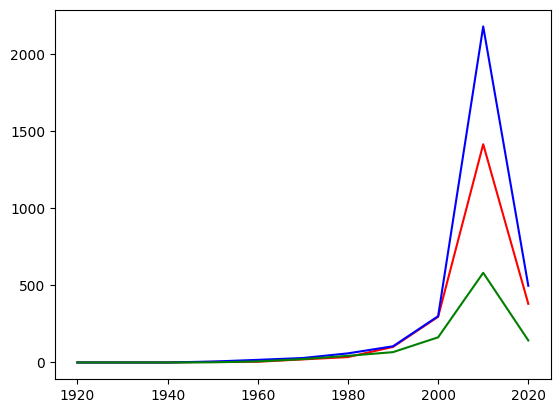

In [898]:
comedy_count=netflix_df.groupby(['decade'])['isComedy'].sum()
drama_count=netflix_df.groupby(['decade'])['isDrama'].sum()
action_count=netflix_df.groupby(['decade'])['isAction'].sum()
plt.plot(comedy_count.index,comedy_count.values,color="red")
plt.plot(drama_count.index,drama_count.values,color="blue")
plt.plot(action_count.index,action_count.values,color="green")

In [897]:
df_exploded = netflix_df.assign(genre=netflix_df['listed_in'].str.split(',')).explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()
genre_count_per_decade=df_exploded.groupby(['decade','genre']).size().reset_index(name="countNum").sort_values(ascending=False,by="countNum",ignore_index=True)
genre_count_per_decade

,decade,genre,countNum
0,2010,International Movies,1923
1,2010,Dramas,1656
2,2010,Comedies,1053
3,2010,International TV Shows,921
4,2010,Documentaries,687
...,...,...,...
223,2000,TV Shows,1
224,1990,TV Thrillers,1
225,2000,TV Horror,1
226,2000,TV Thrillers,1


### 4. Country Features

In [ ]:
netflix_df['isUSA']=netflix_df['country'].str.contains("United States",case=False,na=False).astype(int)
netflix_df.sample(3)

In [ ]:
usa_percent=netflix_df['isUSA'].value_counts(normalize=True)*100
usa_percent

In [ ]:
usa_trend = netflix_df.groupby('decade')['isUSA'].mean() * 100
non_usa_trend=netflix_df.groupby('decade')['isUSA'].apply(lambda x:1-x.mean())*100
usa_trend.plot(kind='line', marker='o', label="USA Content",color="red")
non_usa_trend.plot(kind='line', marker='o', label="Non USA Content",color="blue")
plt.xlabel("decade")
plt.title("USA vs Non-USA content share over time")
plt.legend()
plt.show()

### 5. Text Features

In [ ]:
netflix_df['description_length']=netflix_df['description'].apply(lambda x:len(x))
netflix_df.sample(3)

In [ ]:
movie=netflix_df[netflix_df['type']=='Movie']['description_length']
show=netflix_df[netflix_df['type']=='TV Show']['description_length']
plt.hist(movie,bins=8,label="Movie",edgecolor="red",color="blue")
plt.hist(show,bins=5,label="TV Show",color="yellow",edgecolor="aqua")
plt.title("Distribution of Movie Description Lengths")
plt.legend()
plt.xlabel("Description Length (words)")
plt.ylabel("Count")
plt.show()

In [ ]:
netflix_df.boxplot(column='description_length',by='type')
plt.title("Description Length by Type")
plt.suptitle("")  # remove default title
plt.xlabel("Type")
plt.ylabel("Description Length (words)")
plt.show()

## Part C – Mini Assignment Questions

In [ ]:
# 1
counts=netflix_df['release_year'].value_counts().sort_index()
peak_year=counts.idxmax()
peak_count=counts.max()
print(f"The year with the most releases was {peak_year} with {peak_count} titles.")

In [ ]:
# 2
netflix_df['type'].value_counts()
print("Movies dominate the platform\n")

In [ ]:
# 3
print(netflix_df['country'].value_counts().head(3))
print("\n3 countries contribute the most content\nUnited States', 'India', 'United Kingdom")

In [ ]:
# 4
netflix_df.groupby("rating")['type'].value_counts().unstack(fill_value=0)

In [ ]:
# 4
movies_rating = netflix_df[netflix_df['type'] == 'Movie']['rating'].value_counts().idxmax()
print("Most common rating for Movies:", movies_rating)
shows_rating = netflix_df[netflix_df['type'] == 'TV Show']['rating'].value_counts().idxmax()
print("Most common rating for TV Shows:", shows_rating)

In [ ]:
# 5
subset=netflix_df[netflix_df['type']=='Movie']
avg_runtime_by_year=subset.groupby('release_year')['duration_int'].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(avg_runtime_by_year['release_year'], avg_runtime_by_year['duration_int'], marker='o')
plt.title("Average Movie Duration on Netflix Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.show()

In [ ]:
# 6
decade_counts = netflix_df.groupby('decade').size().reset_index(name='count')
print(decade_counts)

   decade  count
0    1920      1
1    1940     15
2    1950     11
3    1960     25
4    1970     70
5    1980    129
6    1990    274
7    2000    810
8    2010   5927
9    2020   1545


Ans1: The year with the most releases was 2018 with 1147 titles.

Ans2: Movies dominate the platform

Ans3: 3 countries contribute the most content are United States, India, United Kingdom

Ans4: Most common rating for Movies: TV-MA and for TV Shows: TV-MA

Ans5: NO, Movies dont tend to be longer now compared to older ones

Ans6: Movies dominate in: International Movies, Dramas, Comedies and TV Shows dominate in:International TV Shows, TV Dramas, TV Comedies / Reality Shows

Ans7: 2010 decade saw the largest growth in Netflix content

Ans8: Yes, there a difference in description_length between Movies and TV Shows

### Completed basic Exploratory Data Analysis (EDA) on the Netflix dataset with insights on content type, genres, countries, and ratings.